# Metaeuristici - Laborator 1

## Obiective

* Familarizarea cu diferite clase de probleme de optimizare
* Metode de căutare locală (ex. metoda gradientului)

## Probleme de optimizare continuă


Optimizare locală:  fie funcția $f:D\to R$, $D=[a_1,b_1]\times [a_2,b_2]\times \ldots \times [a_n,b_n]$, find $x^*\in D$,  astfel încât $f(x^*)\leq f(x)$ for all $x\in D$

Funcții de test:
* Funcția sferă (Sphere function) (uni-modală, convexă) $f:R^n\rightarrow R$, $f(x^1,\ldots, x^n)=\sum_{i=1}^n (x^i)^2$ (un singur optim)

* Funcția Rosenbrock (uni-modală, non-convexă) $f:R^n\rightarrow R$, $f(x^1\ldots, x^n)= \sum_{i=1}^{n-1}(100(x^{i+1}-(x^i)^2)^2+(1-x^i)^2)$ 

* Funcția Ackley(multi-modală) $f:R^n\rightarrow R$, $f(x^1\ldots, x^n)=-20\exp(-0.2\sqrt{\frac{1}{2}\sum_{i=1}^n (x^i)^2})-\exp(\frac{1}{2}\sum_{i=1}^n\cos(2\pi x^i))+e+20$

Mai multe informatii despre aceste funcții și alte funcții de test se găsesc la: https://www.sfu.ca/~ssurjano/optimization.html


In [2]:
# cazul bidemensional
def Rosenbrock(v):
    x = v[0]
    y = v[1]
    return (1.0 - x)**2 + 100.0*(y - x**2)**2
    
def Sphere(v):
    x = v[0]
    y = v[1]
    return x**2 + y**2

def Ackley(v):
    x=v[0]
    y=v[1]
    term1 = -20 * np.exp(-0.2 * ((1/2.) * (x**2 + y**2)**(0.5)))
    term2 = np.exp((1/2.)*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
    return term1 - term2 + 20 + np.exp(1)

## Reprezentarea grafică a funcțiilor

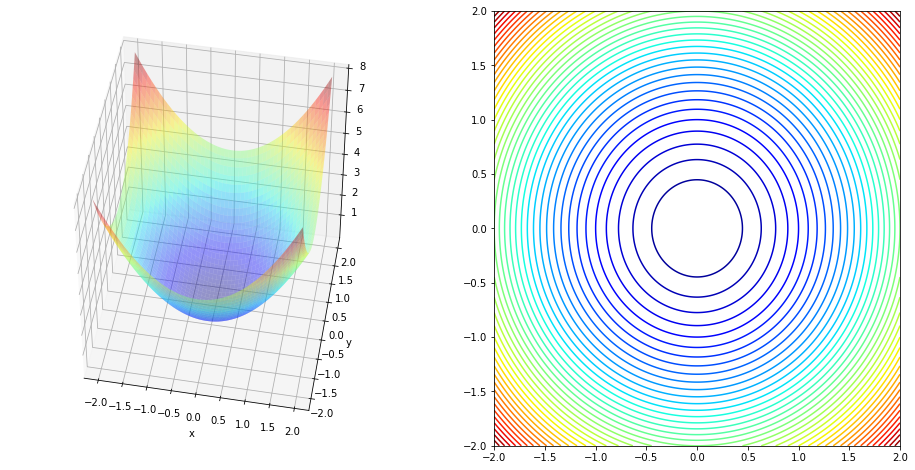

In [3]:
import numpy as np
def FunctionPlot(func, x_start=-2, x_stop=2, y_start=-2, y_stop=2):
    x = np.linspace(x_start,x_stop,250)
    y = np.linspace(y_start,y_stop,250)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    %matplotlib inline
    import matplotlib.pyplot as plt
    #plt.style.use('seaborn-white')
    from mpl_toolkits import mplot3d

    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    
    ax.view_init(45, 280) # view angle
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    #Plotting the iterations and intermediate values
    
    #ax.set_title('Function (surface and contour plot)'.format(len(iter_count)))

    plt.show()
    
FunctionPlot(Sphere, x_start=-2, x_stop=2, y_start=-2, y_stop=2)

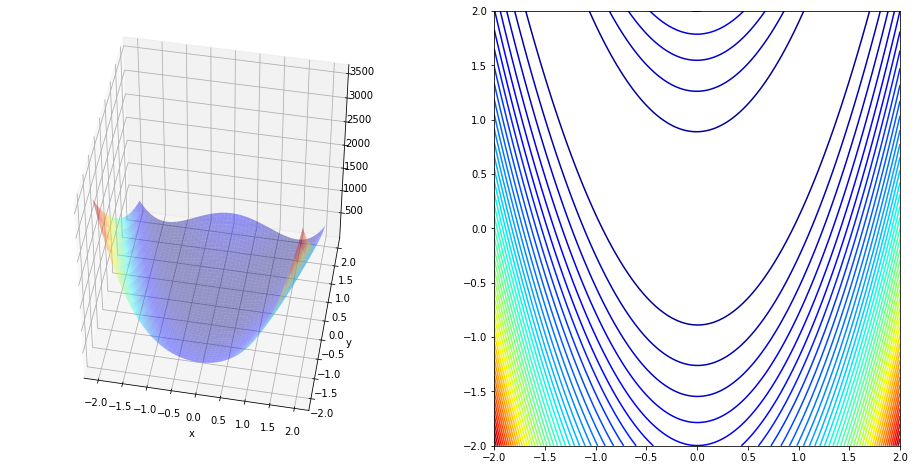

In [4]:
FunctionPlot(Rosenbrock, x_start=-2, x_stop=2, y_start=-2, y_stop=2)

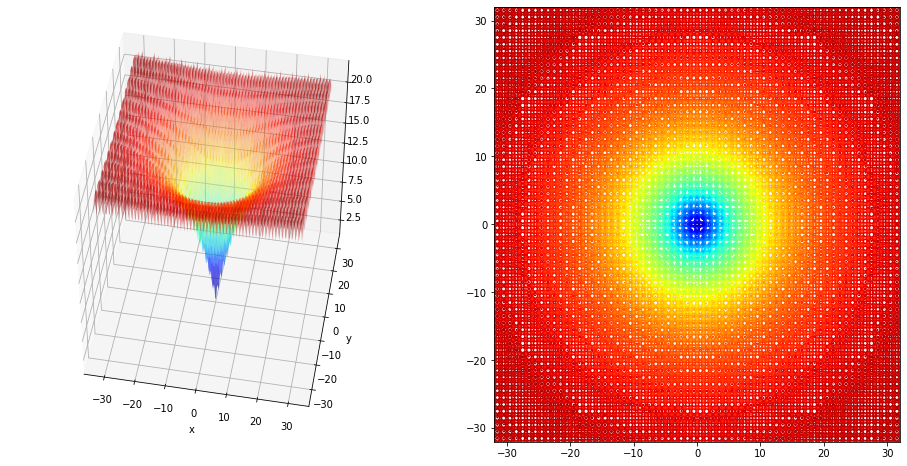

In [5]:
FunctionPlot(Ackley, x_start=-32, x_stop=32, y_start=-32, y_stop=32)

* iterative method which search in the neigborhood of an initial approximation by following a direction given by the gradient (opposite of the gradient in the case of minimization problem

* Set the initial approximation $x_0\in D$ and the descent step size $\gamma$
* Repeat an adjustment step: $x_{k+1}=x_{k}- \gamma \nabla f(x_{k})$, $k=0,1, \ldots$  until the adjustment is small enough (no significant progress)




## Metode bazate  pe calculul gradientului (metode de gadul I)

Metode de optimizare locală care necesită specificarea unei aproximații initiale și a derivatelor (gradientului) în raport cu fiecare dintre variabile. Sunt metode iterative care cată în vecinătatea aproximației inițiale urmând direcția dată de gradient.

Algoritmul poate fi descris astfel:
* Alegerea aproximației inițiale $x_0\in D$ și dimensiunea pasului gradientului $\gamma$
* Repetarea pasului de ajustare: $x_{k+1}=x_{k}- \gamma \nabla f(x_{k})$, $k=0,1, \ldots$  până când gradientul este suficient de mic (nu se observă o înbunătățire semnificativă).



In [7]:
import numpy as np

def Grad_Rosenbrock(v):
    x = v[0]
    y = v[1]
    gx = -400*x*y + 400*x**3 + 2*x -2
    gy = 200*y -200*x**2
    return np.array([gx,gy])
    
def Grad_Sphere(v):
    x = v[0]
    y = v[1]
    gx=2*x
    gy=2*y
    return np.array([gx,gy])

def Gradient_Descent(Grad,x,y, gamma = 0.00125, epsilon=0.0001, nMax = 1000):
    # nMax - maximum iterations number
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    error = 10
    S = np.array([x,y])
    
    #Looping as long as error is greater than epsilon
    while np.linalg.norm(error) > epsilon and i < nMax:
        i +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
        
        S_prev = S
        S = S - gamma * Grad([x,y])
        error = Grad([x,y]) #S - S_prev
        x,y = S[0], S[1]
          
    print('Solution',S)
    return S, iter_x, iter_y, iter_count

root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Sphere, -2, 2, nMax=1000)

Solution [-0.16365691  0.16365691]


#### Exerciții
1. Pentru rulări repetate se obține același rezultat? Argumentați răspunsul.
2. Influențează mărimea pasului, $\gamma$, rezultatul?
3. Aplicați metoda pentru funcția Ackley.

### Reprezentare grafică a procesului de optimizare


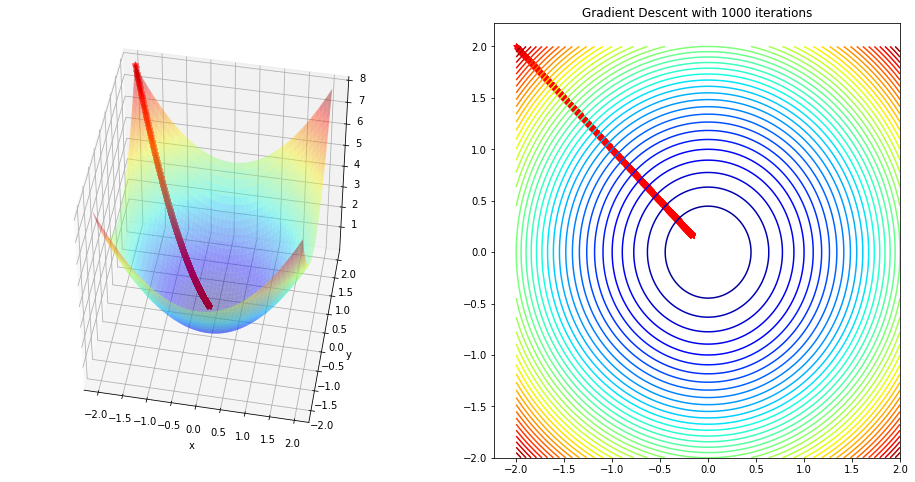

In [8]:
def Graphical_representation(func, iter_x, iter_y, x_start=-2, x_stop=2, y_start=-2, y_stop=2):
    x = np.linspace(x_start,x_stop,250)
    y = np.linspace(y_start,y_stop,250)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    #Angles needed for quiver plot
    anglesx = iter_x[1:] - iter_x[:-1]
    anglesy = iter_y[1:] - iter_y[:-1]

    %matplotlib inline
    import matplotlib.pyplot as plt
    #plt.style.use('seaborn-white')
    from mpl_toolkits import mplot3d

    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(iter_x,iter_y, func([iter_x,iter_y]),color = 'r', marker = '*', alpha = .4)

    ax.view_init(45, 280)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    #Plotting the iterations and intermediate values
    ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
    ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


    plt.show()
    
Graphical_representation(Sphere, iter_x, iter_y, x_start=-2, x_stop=2, y_start=-2, y_stop=2)

Solution [0.76690725 0.58707922]


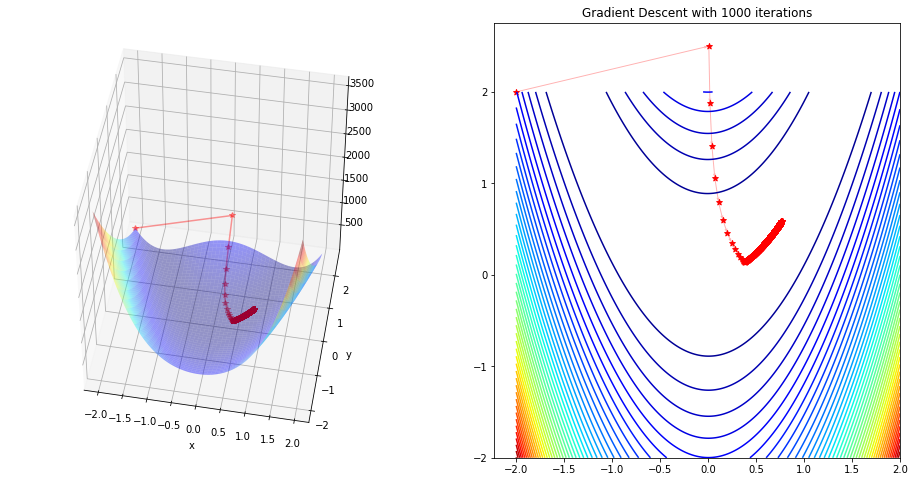

In [13]:
root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Rosenbrock, -2, 2)
Graphical_representation(Rosenbrock, iter_x, iter_y, x_start=-2, x_stop=2, y_start=-2, y_stop=2)

### Metode gradient de gradul II

* aceste metode presupun calcul derivatelor de ordinul doi, de examplu matricea Hessiană  $H$ (matricea conține derivatele de ordinul doi, ex. $H_{i,j}(f(x))=\frac{\partial^2 f(x^1,\ldots,x^n)}{\partial x^i\partial x^j}$, $i=\overline{1,n}$, $j=\overline{1,n}$
* în cazul metodei Newton, procesul iterativ necesită calculul inverseio matrici Hessiene
  $x_{k+1}=x_k- \gamma (H(f(x_k)))^{-1} \nabla f(x_k)$.
* avantajele folosiri unei astfel de metode sunt: convergența rapidă, robustetea; dezavantajele sunt legate de calcul derivatei de ordinul doi și inversei matrici Hessiane 

Biblioteca scipy.optimize oferă diferite metode de optimizare bazate pe metode de tip Newton dar și alți algoritmi de optimizare (https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html).

In [9]:

from  scipy import optimize
# optimize.rosen -> functia Rosenbrock definita in biblioteca scipy
x0 = [2, -1]
#Newton-Conjugate-Gradient algorithm
rez = optimize.minimize(optimize.rosen, x0, method="Newton-CG", jac=optimize.rosen_der, hess=optimize.rosen_hess, options={'xtol': 1e-8, 'disp': True})  
print("Newton-Conjugate-Gradient", rez)

# Broyden-Fletcher-Goldfarb-Shanno algorithm (medoda de tip quasi Newton)
rez = optimize.minimize(Rosenbrock, x0, method='BFGS', jac=Grad_Rosenbrock, options={'gtol': 1e-6, 'disp': True})
rez = optimize.minimize(optimize.rosen, x0, method='BFGS', jac=optimize.rosen_der, options={'disp': True})
print("Broyden-Fletcher-Goldfarb-Shanno algorithm", rez)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 46
         Gradient evaluations: 82
         Hessian evaluations: 37
Newton-Conjugate-Gradient      fun: 2.5922310218606495e-16
     jac: array([ 5.33935899e-06, -2.68043623e-06])
 message: 'Optimization terminated successfully.'
    nfev: 46
    nhev: 37
     nit: 37
    njev: 82
  status: 0
 success: True
       x: array([0.99999998, 0.99999997])
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 54
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 54
         Gradient evaluations: 54
Broyden-Fletcher-Goldfarb-Shanno algorithm       fun: 8.401390671162754e-18
 hess_inv: array([[0.50005755, 1.00018607],
       [1.00018607, 2.00554496]])
      jac: arra

Exerciții

1. Comparați diferite metode de tip Newton implementate in biblioteca scipy (BFGS, Newton-CG, trust-ncg, trust-krylov) din punct de vadere al: (i) optimilui gasit, (ii) numărul evaluări ale funcției, (iii)numărul de evaluări ale gardientului și (iv) numărul de iterații pentru următoarele dimensiuni ale funcției Rosenbrock: $n=2,3,4,5,10$.

2. Pentru a realiza aceelași prelucrări pentru funcțiile Sphere și Ackley. 


### Algoritmul Pattern search
Algoritm de optimizare locală care nu se bazează pe calcul derivatelor.



best [-0.9767141  0.9767141]


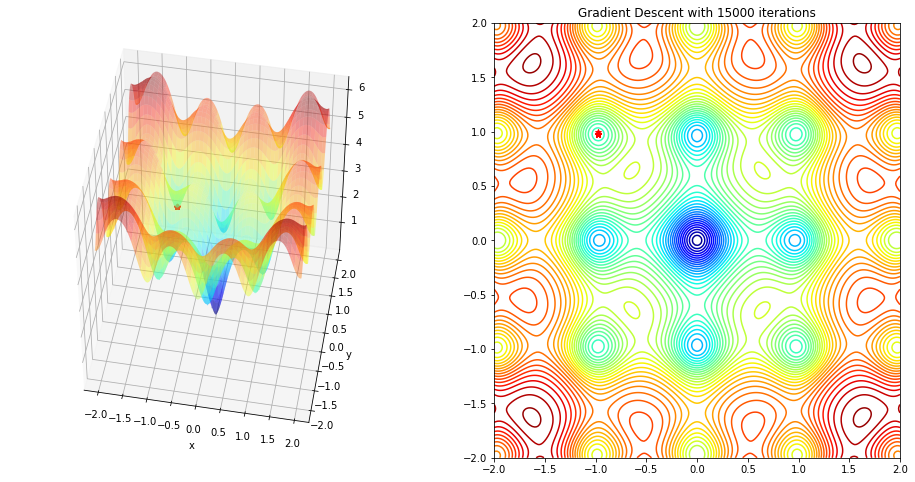

In [39]:
def Pattern_Search(f ,x, y, r=0.8, nMax = 10):
    #Initialization
    i = 0
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    S = np.array([x,y])
    E = np.array([0,0])
    best = S
    val_best = f(S)
    
    #Looping as long as error is greater than epsilon
    while i < nMax:
        i +=1
        
        S_prim = S
        for j in range(len(E)):
            E[j-1] = 0
            E[j] = 1
            val_S_prim = f(S_prim)
            S_plus = S + r*E
            if f(S_plus)< val_S_prim:
               S_prim = S_plus
            S_minus = S - r*E
            if f(S_minus)< val_S_prim:
               S_prim = S_minus 
        if np.array_equal(S, S_prim ):
            r = r/2
        else:
            S = S_prim
            
        if f(S) < val_best:
            best = S
            val_best = f(S)
            x,y = S[0], S[1]
            
            iter_x = np.append(iter_x,x)
            iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,i)   
             
    return best, iter_x,iter_y, iter_count

best,iter_x,iter_y, iter_count = Pattern_Search(Ackley, -1,1, r=0.8, nMax = 15000)
print("best", best)
Graphical_representation(Ackley, iter_x, iter_y,  x_start=-2, x_stop=2, y_start=-2, y_stop=2)

#### Exerciții
1. Pentru rulări multiple algoritmul furnizează ceelași rezultat?
2. Influențează numărul de iterații rezultatul? 
3. Comparații pentru diferite dimensiuni ale pasului rezultatele obținute de algoritm pentru cele trei funcții.

<table>
  <thead>
    <tr>
      <th>Dimensiune Pas</th>
      <th>Sphere</th>
      <th>Rosenbrock</th>
      <th>Ackley</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0.8</td>
      <td>[-0.9767141  0.9767141]</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <td>0.6</td>
      <td>-</td>
      <td>-</td>
      <td>-</td>
    </tr>
  </tbody>
</table>



### Probleme de optimizare cu combinatorială

Problemele de optimizare combinatorială se caracterizează prin faptul că spațiul de căutare este discret, însă de dimensiuni mari ceea ce exclude o explorare exhaustivă.

* Problema comis voiajorului

Este una dintre cele mai cunoscute probleme de optimizare combinatorială putând fi enunțată după cum urmează: “se consideră o mulțime de n orașe și un comis-voiajor care trebuie săviziteze toate orașele, trecând o singură dată prin fiecare și să se întoarcă în orașul de pornire astfel încât costul total al circuitului să fie cât mai mic”.

* Problemă de alocare de resurse

O aplicație software formată din mai multe servicii/componente (care pot fi conflictuale) care trebuie instalate pe mai multe mașini virtula (VMs) astfel încât să se utilizeze cât mai puține mașini viruale (minimizeze numărul de mașini virtuale necesar).

#### Exercițiu

1. Analizați implementarea bazată pe tehnica Branch and Bound pentru rezolvarea problemei comis voiajorului (TSP). Afisați câte noduri sunt explorate de algoritmul bazat de tehnica Branch and Bound, utilizând implemnentării de mai jos, comparativ cu tehnica back-traking?

In [20]:
import numpy as np
# a =np.array([
# [np.inf, 7, 6,8,4],
# [7, np.inf, 8,5,6],
# [6,8,np.inf,9,7],
# [8,5,9,np.inf,8],
# [4,6,7,8,np.inf]
# ])

#a =np.array([
#  [np.inf, 4,6,2],
#     [7, np.inf,5,3],
#     [2,1,np.inf, 9],
#     [8,7,2,np.inf]
# ])

a =np.array([
 [np.inf, 10,8,9,7],
    [10, np.inf,10,5,6],
    [8,10,np.inf, 8,9],
    [9,5,8,np.inf,6],
    [7,6,9,6,np.inf]
])

#a =np.array([
# [np.inf, 2,1,np.inf],
#    [2, np.inf,4,3],
#    [1,4,np.inf, 2],
#    [np.inf,3,2,np.inf]
#])
def minizareLinie(a):
    mins = []
    ret = 0
    for linie in a:
        minim = np.nanmin(linie)
        if minim == np.nan or minim == np.inf: continue
        linie -= minim
        ret += minim
        
    return ret
       
def minimizaColoana(a):
    n = len(a)
    ret = 0
    for i in range(n):
        if not np.isin(0, a[:,i]):
             minim = np.nanmin(a[:,i])
             if minim == np.nan or minim == np.inf: continue
             a[:,i] -= minim
             ret += minim
    return ret
       
class Nod():
    def __init__(self, cost, traseu, matrice, nrOraseVizitate):
        self.cost = cost
        self.traseu = traseu.copy()
        self.matrice = matrice.copy()
        self.nrOraseVizitate = nrOraseVizitate
    def __le__(self, nod):
        return self.cost < nod.cost
    def __repr__(self):
        return "cost={} {}".format(self.cost,self.traseu)
    
#step 1
N = len(a)
visited = np.zeros(N)
cost = minizareLinie(a)
cost += minimizaColoana(a)

#"dupa prima normalizare"

visited[0]=1
lastVisited = 0
index = 1

exploredNodes=[Nod(cost, visited, a, 1)]

while True:
    #gaseste nodul (traseul) de cost minim de la pasul curent
    costMin = exploredNodes[0].cost
    indexMin = 0
    for i in range (1, len(exploredNodes)):
        if costMin > exploredNodes[i].cost:
            costMin = exploredNodes[i].cost
            indexMin = i
    if not np.isin(0, exploredNodes[indexMin].traseu):
        print (exploredNodes[indexMin].traseu)
        break
    #print ("dina pop:", exploredNodes)
    #expandeaza nodul pentru a calcula variantele posibile
   
    urmatoareaPozitie = exploredNodes[indexMin].nrOraseVizitate + 1
    cost = exploredNodes[indexMin].cost
    for i in range(N):
        visited = exploredNodes[indexMin].traseu.copy()
        if visited[i] == 0:
            b = exploredNodes[indexMin].matrice.copy()
            nod = i
            for k in range(N):
                b[lastVisited][k] = np.inf
                b[k][nod] =  np.inf
            b[nod][lastVisited] = np.inf
            lcost = minizareLinie(b)
            lcost += minimizaColoana(b)
            visited[nod] = urmatoareaPozitie
            
            exploredNodes.append(Nod(cost + lcost + a[lastVisited][nod], visited, b, urmatoareaPozitie))
    exploredNodes.pop(indexMin)
    
     

[1. 4. 2. 3. 5.]


## Problemă alocare de resurse

O aplicație software formată din mai multe servicii/componente, $nr_componente$ care trebuie instalate pe mai multe mașini virtula (VMs) astfel încât să se utilizeze cât mai puține mașini viruale (minimizeze numărul de mașini virtuale necesar). Se cunoaște de la început:
* numărul maxim de mașini virtuale care s-ar putea achiziționa
* descrierea aplicației:
 * numărul de componente
 * retații între componente
 
Relațiile dintre componente pot să fie de mai multe feluri, de exemplu
* **conflict** două componente nu pot fi plasate pe aceeași mașină virtuală
* **numar componente** o componentă trebuie să aibă un număr de instanțe într-un anumit interval $[n1,n2]$, sau o combinație de componente trebuie să aibă un număr de instanțe într-un anumit interval $[n1,n2]$
* **dependințe între două componente** numărul de instanțe al componentei $\alpha$ depende de numărul de instanțe al componentein $\beta$


In [19]:
import pulp


class Aplicatie:
    def __init__(self, nr_componente, nr_vms):
        self.nr_comps = nr_componente
        self.nr_vms = nr_vms
        self.__creareModel()
        
    def __creareModel(self):
        self. model = pulp.LpProblem("Plasare componente aplicatie pe VM", pulp.LpMinimize)

        #definire variabile
        self.vms = ["VM" + str(i + 1) for i in range(self.nr_vms)]
        self.comps = ["C" + str(i + 1) for i in range(self.nr_comps)]

        self.a = pulp.LpVariable.dicts("a", ((i, j) for i in self.comps for j in self.vms), lowBound=0, upBound=1,
                                       cat=pulp.LpInteger)
        self.vm = pulp.LpVariable.dicts("vm", (j for j in self.vms), lowBound=0, upBound=1, cat=pulp.LpInteger)
        
        # Functia obiectiv
        self.model += pulp.lpSum([self.vm[j] for j in self.vms])
        
        #constrangeri generale
        self.__GC1()
        self.__GC2()
        
    def __GC1(self):
        """Fiecare componenta este cel putin o data instantiata"""
        """At least one instance of a component is deployed on acquired VM"""
        for i in self.comps:
            self.model += pulp.lpSum([self.a[i, j] for j in self.vms]) >= 1
            
    def __GC2(self):
        """The components are deployed only on acquired VM"""
        #print('----------GC3--------------')
        for j in self.vms:
            for i in self.comps:
                self.model += self.a[i, j] <= self.vm[j]
                
    def componentConflictConstrain(self, alphaCompID, conflictCompsIDList):
        """
        Constrain that describe the constraints between components
        :param alphaComponentId - ID of the component that is in conflict with other components, ID should be in set {1,...,N}
        :param conflictCompsIDList - the IDs list of components that alphaComponent is in conflict, ID should be in set {1,...,N}
        """
        alphaComp = "C"+str(alphaCompID)
       
        conflictComps = []
        for i in conflictCompsIDList: conflictComps.append("C"+str(i))
       
        for j in self.vms:
            for i in conflictComps:
                self.model += pulp.lpSum([self.a[alphaComp, j], self.a[i, j]]) <= 1


    def componentNumberConstrain(self, compsIdList, n1, n2, operation):
        """
        Constrains that defines the number of instances that a component must have
        :param compsIdList:
        :param n1: a positive limit for components number
        :param n2: a positive limit for components number
        :param operation: should be one of the strings {"<=","==",">=","in"}
            "<=": sum(compsIdList) <= n1
            ">=": sum(compsIdList) >= n1
            "==": sum(compsIdList) == n1
            "in": n1 <= sum(compsIdList) <= n2
        """
        compsList = []
        for i in compsIdList:
            compsList.append("C" + str(i))

        if operation == "<=":
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) <= n1

        elif operation == ">=":
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) >= n1

        elif operation == "==":
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) == n1

        elif operation == "in":
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) >= n1
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) <= n2
        
    def componentsNumberDependencyConstraint(self, alphaCompId, betaCompId, operation):
        """
        The number of instance of component alpha depends on the number of instances of component beta
        :param alphaCompId: ID of component alpha, ID should be in set {1,...,N}
        :param betaCompId: ID of component beta, ID should be in set {1,...,N}
        :param operation: one of the strings in set {"==", "<=", ">="}
            "==": sum(instances of alpha component) == sum(instances of beta component)
            "<=": sum(instances of alpha component) <= sum(instances of beta component)
            ">=": sum(instances of alpha component) >= sum(instances of beta component)
        :return: None
        """
        alphaComp = "C" +str(alphaCompId)
        betaComp = "C" + str(betaCompId)
        if operation == "<=":
            self.model += pulp.lpSum([self.a[alphaComp, j] for j in self.vms]) <= pulp.lpSum([self.a[betaComp, j] for j in self.vms])
        elif operation == ">=":
            self.model += pulp.lpSum([self.a[alphaComp, j] for j in self.nrVM]) >= pulp.lpSum([self.a[betaComp, j] for j in self.nrVM])
        elif operation == "==":
            self.model += pulp.lpSum([self.a[alphaComp, j] for j in self.nrVM]) == pulp.lpSum([self.a[betaComp, j] for j in self.nrVM])

    def run(self):
        self.model.solve()
       
        best_nr_of_vm = -1
        _vm = []
        _a = []

        if pulp.LpStatus[self.model.status] == "Optimal":
            best_nr_of_vm = pulp.value(self.model.objective)
            print("Objective value:", best_nr_of_vm)

            for vm in self.vms:
                _vm.append(int(pulp.value(self.vm[vm])))

            for i in self.comps:
                line = []
                for j in self.vms:
                    line.append(int(pulp.value(self.a[i,j])))
                _a.append(line)

        return  best_nr_of_vm, _vm, _a   
    
cp = Aplicatie(5, 8)

cp.componentConflictConstrain(1, [2, 3])
cp.componentConflictConstrain(2, [3])
cp.componentConflictConstrain(4, [1, 2, 3, 5])
#cp.componentNumberConstrain([5], 1, None, "==")
#cp.componentNumberConstrain([2, 3], 3, None, ">=")  
#cp.componentsNumberDependencyConstraint(3, 6, "<=")
print (cp.run())


Objective value: 4.0
(4.0, [0, 0, 0, 0, 1, 1, 1, 1], [[0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1]])


#### Exserciții

1. Deseanți graful de conflicte între componentele aplicației descrise mai sus.

### Tema 
Alegeti una din cele două cerințe, nu sunt obligatorii ambele probleme.

1. Adaugați o constrângere care reflectă următoarea situație: o componentă trebuie alocată pe toate mașinile pe care nu există componente cu care ea este în conflict. O astfel de componentă poate fi o componentă care realizează monitorizarea sistemului.

* Generati automat grafuri de conflicte, cu diferite grade de conflict între componente (10% din componente in conflict, 20%, 50%) pentru un numar diferit de componenete, pentru a verifica scalabilitatea abordării. 

